# 2. Read table and analysis

1. Read table and processing


In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pa
import zipfile
import os
import matplotlib.pyplot as plt


## read data

In [3]:
path= "D:/DATA_Analayses/Project/TennisGame/data/processed"
dris = os.listdir(path)
name_of_folder = pd.Series(dris)




In [2]:
GameInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/GameInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchEventInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchEventInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchRoundInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"])
MatchSeasonInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"])
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"])
MatchTournamentInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"])
MatchVenueInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"])
MatchVotesInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"])
OddsInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/OddsInfo.csv").drop(columns=["Unnamed: 0"])
PeriodInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PeriodInfo.csv").drop(columns=["Unnamed: 0"])
PowerInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PowerInfo.csv").drop(columns=["Unnamed: 0"])


### 1.	How many tennis players are included in the dataset?

In [164]:
MatchHomeTeamInfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       14090 non-null  int64  
 1   name           14090 non-null  object 
 2   slug           14090 non-null  object 
 3   gender         14061 non-null  object 
 4   user_count     14090 non-null  int64  
 5   residence      3764 non-null   object 
 6   birthplace     7806 non-null   object 
 7   height         7585 non-null   float64
 8   weight         3610 non-null   float64
 9   plays          6737 non-null   object 
 10  turned_pro     2668 non-null   float64
 11  current_prize  13984 non-null  float64
 12  total_prize    14047 non-null  float64
 13  player_id      14090 non-null  int64  
 14  current_rank   13933 non-null  float64
 15  name_code      14090 non-null  object 
 16  country        14090 non-null  object 
 17  full_name      14090 non-null  object 
dtypes: flo

1st way: Find player with player_id

In [249]:
player_id = pd.concat([MatchAwayTeamInfo["player_id"], MatchHomeTeamInfo["player_id"]])
# player_id.unique().size
print(f"Avrage high players is  {player_id.unique().size}")

Avrage high players is  2352


2nd way: Find player with full_name

In [250]:
player_full_name = pd.concat([MatchAwayTeamInfo["full_name"], MatchHomeTeamInfo["full_name"]])
player_full_name.unique().size

print(f"Avrage high players is  {player_full_name.unique().size}")

Avrage high players is  2353


### 2.	What is the average height of the players?

In [167]:
MatchAwayTeamInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12955 entries, 0 to 12954
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       12955 non-null  int64  
 1   name           12955 non-null  object 
 2   slug           12955 non-null  object 
 3   gender         12933 non-null  object 
 4   user_count     12955 non-null  int64  
 5   residence      3601 non-null   object 
 6   birthplace     7235 non-null   object 
 7   height         7008 non-null   float64
 8   weight         3496 non-null   float64
 9   plays          6432 non-null   object 
 10  turned_pro     2586 non-null   float64
 11  current_prize  12808 non-null  float64
 12  total_prize    12900 non-null  float64
 13  player_id      12955 non-null  int64  
 14  current_rank   12733 non-null  float64
 15  name_code      12955 non-null  object 
 16  country        12954 non-null  object 
 17  full_name      12955 non-null  object 
dtypes: flo

In [182]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])

player_info[player_info.duplicated()].sort_values("player_id")
#----------------------------------

player_id = player_info["player_id"].unique()
player_id_nan_notna=[]
for i in range(player_id.size):
    nullcount = player_info[player_info["player_id"]==player_id[i]]["height"].isna().sum()
    nanullcount = player_info[player_info["player_id"]==player_id[i]]["height"].notna().sum()
    if nullcount != 0:
        if nanullcount !=0:
            player_id_nan_notna.append(i)
            print(i)
player_id_nan_notna = pd.Series(player_id_nan_notna)

print(player_id_nan_notna)

36
217
878
1452
1684
1985
2321
0      36
1     217
2     878
3    1452
4    1684
5    1985
6    2321
dtype: int64


In [183]:
for i in player_id_nan_notna:
    player_info[player_info["player_id"]==player_id[i]] = (player_info[player_info["player_id"]==player_id[i]]
                                                           .sort_values("height").ffill())


discribe information of hight pleyers

In [201]:
player_info_cleaned = player_info.drop_duplicates(subset=["player_id"])
player_info_cleaned["height"].describe()



count    1202.000000
mean        1.820042
std         0.080405
min         1.570000
25%         1.780000
50%         1.830000
75%         1.880000
max         2.080000
Name: height, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

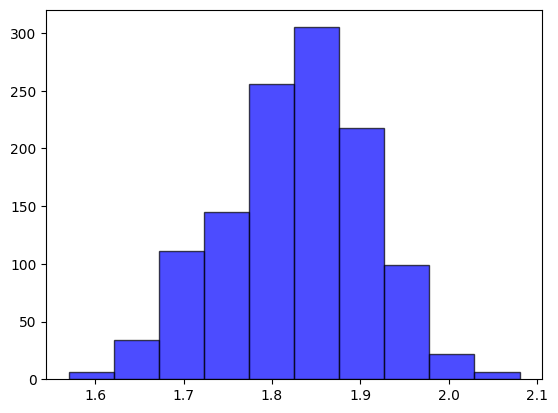

In [261]:
plt.hist(player_info_cleaned["height"], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.show

In [239]:
player_info_cleaned_mode = float(player_info_cleaned["height"].mode().iloc[0])
avrage_high_player = (player_info_cleaned
                        .fillna(value = player_info_cleaned_mode)["height"]
                        .mean().round(4))

print(f"avrage high players is  {avrage_high_player}")

avrage high players is  1.8249


### 3.	Which player has the highest number of wins?

In [302]:
GameInfo[(GameInfo["match_id"]==12301140) & (GameInfo["set_id"]==1)]


,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
114,12301140,1,12,0,15,0,0,1,5,5,7,1,2
115,12301140,1,12,1,15,15,0,5,1,5,7,1,2
116,12301140,1,12,2,15,30,0,5,1,5,7,1,2
117,12301140,1,12,3,15,40,0,5,3,5,7,1,2
118,12301140,1,11,0,0,15,0,5,1,5,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95324,12301140,1,2,7,40,40,2,5,1,2,0,1,1
95325,12301140,1,2,8,A,40,0,1,5,2,0,1,1
95326,12301140,1,1,0,15,0,0,1,5,1,0,2,1
95327,12301140,1,1,1,30,0,2,1,5,1,0,2,1


In [321]:
MatchEventInfo.head(10)

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,12276860,1.0,3,A,hQVbsOCic,1.0,3,1714744500,navone-nava,False
1,12296111,1.0,NaN,NaN,GtGfhfBc,1.0,3,1714662000,torres-murcia-lodikova,True
2,12302789,NaN,NaN,NaN,ILUbsHRbc,1.0,3,1714749300,riera-romero-gormaz,False
3,12261530,1.0,12,7,fKRsLveb,2.0,3,1714751100,fritz-rublev,False
4,12276777,1.0,NaN,NaN,ETGbswjkc,2.0,3,1714799400,schoolkate-hsu,True
5,12298997,2.0,NaN,NaN,bYNsqZId,2.0,3,1714655400,fakih-rinaldo-persson,False
6,12301636,1.0,NaN,NaN,gvadsMmtd,2.0,3,1714753200,jovic-joint,False
7,12300122,1.0,NaN,NaN,JtaciLWAc,1.0,3,1714729500,hietaranta-sakellaridi,True
8,12276812,2.0,Q,NaN,FnpshQe,2.0,3,1714751100,sell-mena,True
9,12301358,1.0,NaN,NaN,cDacsCQHb,1.0,3,1714754700,nordquist-denolly,True


In [327]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])

all_wins = home_merge
player_names = all_wins[['player_id', 'full_name']].drop_duplicates()

home_merge[home_merge["match_id"]==12301636]




,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,...,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
13,12301636,1.0,NaN,NaN,gvadsMmtd,2.0,3,1714753200,jovic-joint,False,...,NaN,NaN,NaN,4253.0,9615.0,420632,509.0,JOV,USA,"Jovic, Iva"
14,12301636,1.0,NaN,NaN,gvadsMmtd,2.0,3,1714753200,jovic-joint,False,...,NaN,NaN,NaN,4253.0,9615.0,420632,509.0,JOV,USA,"Jovic, Iva"
593,12301636,1.0,NaN,NaN,gdadsHmtd,2.0,3,1714755900,jovic-joint,False,...,NaN,NaN,NaN,4253.0,9615.0,420632,509.0,JOV,USA,"Jovic, Iva"
594,12301636,1.0,NaN,NaN,gdadsHmtd,2.0,3,1714755900,jovic-joint,False,...,NaN,NaN,NaN,4253.0,9615.0,420632,509.0,JOV,USA,"Jovic, Iva"


In [345]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge["winner_code"] == 1][["player_id", "name", "winner_code"]].copy()
away_wins = away_marge[away_marge["winner_code"] == 2][["player_id", "name", "winner_code"]].copy()





away_wins.head(1)

,player_id,name,winner_code
7,106755,Rublev A.,2.0


In [346]:
away_wins['winner_code'].isna().sum()

np.int64(0)

In [349]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge['winner_code'] == 1][['player_id', 'name']].copy()
away_wins = away_marge[away_marge['winner_code'] == 2][['player_id', 'name']].copy()

# Combine home wins and away wins
all_wins = pd.concat([home_wins, away_wins])

# Calculate the number of wins for each player
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

# Merge with player names
player_names = all_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

# Find the player with the highest number of wins
top_player = win_counts.loc[win_counts['wins'].idxmax()]

# Display the result
print("Player with the highest number of wins:\n", top_player)


Player with the highest number of wins:
 player_id         253356
wins                  75
name         Uchijima M.
Name: 0, dtype: object


### 4.	What is the longest match recorded in terms of duration?

In [355]:
MatchTimeInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19676 entries, 0 to 19675
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        19676 non-null  int64  
 1   period_1                        13029 non-null  float64
 2   period_2                        12901 non-null  float64
 3   period_3                        3931 non-null   float64
 4   period_4                        95 non-null     float64
 5   period_5                        40 non-null     float64
 6   current_period_start_timestamp  13436 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [420]:
timestamp = (MatchTimeInfo.groupby(by="match_id").sum()
                .drop(columns=["current_period_start_timestamp"])
                 .sum(axis=1).sort_values(ascending=False))
print(f"maximum match time is for ** {timestamp.idxmax()} ** ID and time is ** {timestamp[timestamp.idxmax()]} **")

maximum match time is for ** 12346747 ** ID and time is ** 513458.0 **


match_id
12346747    513458.0
12300269    495119.0
12336297    488111.0
12357962    464630.0
12295121    409912.0
              ...   
12326249         0.0
12326248         0.0
12326246         0.0
12326245         0.0
12386383         0.0
Length: 9319, dtype: float64

In [409]:
timestamp_pivot_table = pd.pivot_table(MatchTimeInfo, values=['period_1', 'period_2', 'period_3', 'period_4', 'period_5'], index='match_id', aggfunc='sum')
timestamp_pivot_table.sum(axis=1).sort_values(ascending=False)


match_id
12346747    513458.0
12300269    495119.0
12336297    488111.0
12357962    464630.0
12295121    409912.0
              ...   
12326249         0.0
12326248         0.0
12326246         0.0
12326245         0.0
12386383         0.0
Length: 9319, dtype: float64

### 5.	How many sets are typically played in a tennis match?

In [5]:
GameInfo["set_id"][GameInfo["set_id"]==1].count()

np.int64(650561)

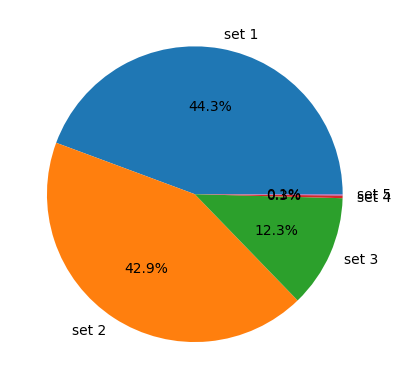

In [30]:
count_set_per_match =pd.DataFrame(GameInfo.groupby(by="set_id").count()["match_id"])
count_set_per_match["per_set"] = count_set_per_match/count_set_per_match.sum()*100
mylabels=[]
for i in range(5):
    mylabels.append(f"set {i+1}")

plt.pie(count_set_per_match["per_set"], labels=mylabels, autopct= "%1.1f%%")
plt.show()

In [7]:
count_set={"set":"count"}
for i in range(1,6):
    count = (GameInfo["set_id"][GameInfo["set_id"]==i].count())
    count_set[i] = count

count_set


{'set': 'count',
 1: np.int64(650561),
 2: np.int64(629257),
 3: np.int64(180873),
 4: np.int64(4347),
 5: np.int64(1975)}

### 6.	Which country has produced the most successful tennis players?

top country  =  USA


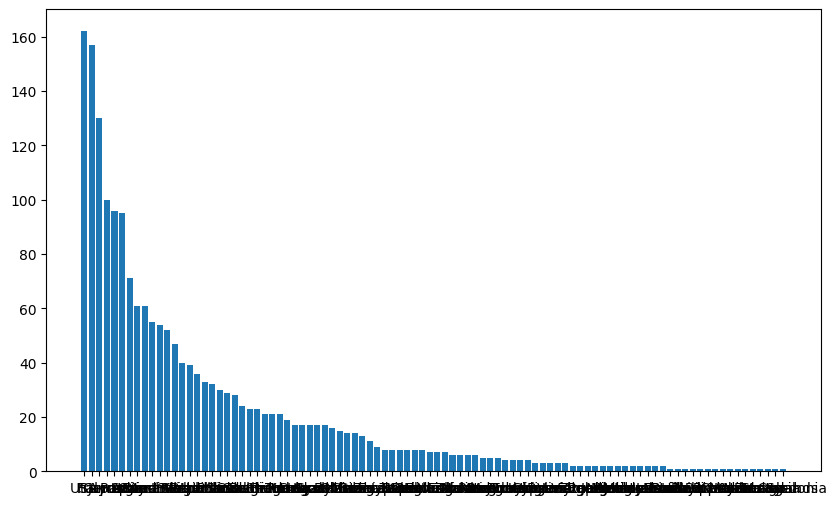

In [69]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge['winner_code'] == 1][['player_id', 'name',"country"]].copy()
away_wins = away_marge[away_marge['winner_code'] == 2][['player_id', 'name', "country"]].copy()

# Combine home wins and away wins
all_wins = pd.concat([home_wins, away_wins])

# Calculate the number of wins for each player
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

# Merge with player names
player_names = all_wins[['player_id', 'name', "country"]].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

country_win = (win_counts.groupby(by="country").count()["wins"]
 .sort_values(ascending=False))

print(f"top country  =  {country_win.idxmax()}")
plt.figure(figsize=(10, 6))
plt.bar(country_win.index, country_win.values)
plt.show()

### 7.	What is the average number of aces per match?

In [149]:
acc_info = PeriodInfo[(PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')].drop_duplicates()


In [147]:
PeriodInfo[(PeriodInfo["match_id"]==12346364)]

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
100448,12346364,ALL,service,aces,5,4,1,positive,event,4,4,NaN,NaN
100449,12346364,ALL,service,double_faults,1,0,1,negative,event,0,0,NaN,NaN
100450,12346364,ALL,service,first_serve,22/30 (73%),23/32 (72%),1,positive,team,42,0,30.0,32.0
100451,12346364,ALL,service,second_serve,7/8 (88%),9/9 (100%),2,positive,team,2,14,8.0,9.0
100452,12346364,ALL,service,first_serve_points,18/22 (82%),18/23 (78%),1,positive,team,28,8,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517109,12346364,4TH,return,first_serve_return_points,7/29 (24%),6/26 (23%),1,positive,team,8,4,29.0,26.0
517110,12346364,4TH,return,second_serve_return_points,6/13 (46%),5/14 (35%),1,positive,team,8,0,13.0,14.0
517111,12346364,4TH,return,return_games_played,6,6,3,positive,event,6,10,NaN,NaN
517112,12346364,4TH,return,break_points_converted,0,0,3,positive,event,0,0,NaN,NaN


In [145]:
PeriodInfo[(PeriodInfo["match_id"]==12346364) & (PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')]


,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
100448,12346364,ALL,service,aces,5,4,1,positive,event,4,4,NaN,NaN
391787,12346364,ALL,service,aces,16,16,3,positive,event,6,2,NaN,NaN
517004,12346364,ALL,service,aces,16,16,3,positive,event,24,20,NaN,NaN


In [153]:
acc_info_home_away = acc_info[["match_id", "home_stat", "away_stat"]]
acc_info_home_away[["home_stat", "away_stat"]] = acc_info_home_away[["home_stat", "away_stat"]].astype(int)
acc_info_home_away

acc_info_home_away.groupby("match_id").count().sort_values(by="home_stat",ascending=False)

C:\Users\user\Oracel19c\admin\orcl\Temp\ipykernel_14656\496309483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_info_home_away[["home_stat", "away_stat"]] = acc_info_home_away[["home_stat", "away_stat"]].astype(int)


,home_stat,away_stat
match_id,,
12309628,3,3
12309589,3,3
12304489,3,3
12330606,3,3
12339748,3,3
...,...,...
12328594,1,1
12328575,1,1
12328565,1,1


In [126]:
acc_info_home_away.loc[61061]["home_stat"]

np.int64(5)

In [154]:
ace_info= PeriodInfo[(PeriodInfo['statistic_name'] =='aces') & (PeriodInfo['period'] ==('ALL'))]
ace_count =( pd.DataFrame(pd.pivot_table(ace_info, values=['statistic_name'],index='match_id', aggfunc='count')))
ace_count.sort_values('statistic_name',ascending=False).mean()

statistic_name    1.974695
dtype: float64

### 10 Q

In [8]:
home_players = MatchHomeTeamInfo[["player_id", 'current_rank', "height"]]
away_players = MatchAwayTeamInfo[["player_id", 'current_rank', "height"]]
all_players = pd.concat([home_players, away_players])
cleaned_all_players = all_players.drop_duplicates(subset=['player_id'])
height_mode = float(cleaned_all_players['height'].mode().iloc[0])
cleaned_all_players = cleaned_all_players.fillna(value = height_mode)
x = cleaned_all_players['height']
y = cleaned_all_players['current_rank']

correlation = x.corr(y)
if abs(correlation) > 0.5:
    print("There is a strong relationship between height and current rank.")
elif abs(correlation) > 0.3:
    print("There is a moderate relationship between height and current rank.")
else:
    print("There is a weak relationship between height and current rank.")

There is a weak relationship between height and current rank.


### 16.	Which player has the highest winning percentage against top 10 ranked opponents?

In [89]:
all_player.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
22414,12309658,Amoros Ramos P.,amoros-ramos-pol,M,96,NaN,NaN,NaN,NaN,right-handed,NaN,1137.0,5043.0,152830,1858.0,AMO,Spain,"Amoros Ramos, Pol"
3855,12368608,Rocens M.,rocens-martins,M,70,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
1937,12375839,Rocens M.,rocens-martins,M,71,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
21608,12311676,Amoros Ramos P.,amoros-ramos-pol,M,96,NaN,NaN,NaN,NaN,right-handed,NaN,1137.0,5043.0,152830,1858.0,AMO,Spain,"Amoros Ramos, Pol"
21549,12311674,Rocens M.,rocens-martins,M,72,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"


In [253]:
all_player_with_match_id = (pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo],
                           ignore_index=True)
                           .sort_values("current_rank", ascending=False))

all_player_with_need_coulmn = (all_player_with_match_id[["full_name","match_id", "player_id", "current_rank"]]
                               .sort_values(["current_rank", "full_name"], ascending=False, ignore_index=True))

all_player_uniqe = (all_player_with_need_coulmn.drop_duplicates("player_id", ignore_index=True)
                    .drop("match_id", axis=1))

top_ten_palyers = all_player_uniqe.iloc[:10]

match_id_top_ten_palayed = (all_player_with_need_coulmn[all_player_with_need_coulmn["player_id"]
                                                        .isin(top_ten_palyers["player_id"])])

match_id_top_ten_palayed

,full_name,match_id,player_id,current_rank
0,"Rocens, Martins",12368608,236825,1858.0
1,"Rocens, Martins",12375839,236825,1858.0
2,"Rocens, Martins",12311674,236825,1858.0
3,"Rocens, Martins",12379407,236825,1858.0
4,"Rocens, Martins",12373206,236825,1858.0
...,...,...,...,...
125,"Stoica, Vlad",12373264,203673,1525.0
126,"Stoica, Vlad",12370412,203673,1525.0
127,"Stoica, Vlad",12373264,203673,1525.0
128,"Stoica, Vlad",12375662,203673,1525.0


In [249]:
all_player_with_match_id = (pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo],
                           ignore_index=True)
                           .sort_values("current_rank", ascending=False)
                           .drop_duplicates(subset=["match_id", "player_id"]))

all_player_with_need_coulmn = (all_player_with_match_id[["full_name","match_id", "player_id", "current_rank"]]
                               .sort_values(["current_rank", "full_name"], ascending=False, ignore_index=True))

all_player_uniqe = (all_player_with_need_coulmn.drop_duplicates("player_id", ignore_index=True)
                    .drop("match_id", axis=1))

top_ten_palyers = (all_player_uniqe[all_player_uniqe["current_rank"]
                                    .isin(all_player_uniqe["current_rank"]
                                    .nlargest(n=10))])


match_between_tow_player = (all_player_with_need_coulmn.pivot_table
                           (index="match_id",
                            columns=all_player_with_need_coulmn.groupby("match_id").cumcount(),
                            values="player_id",
                            aggfunc='first').add_prefix("player")
                            .reset_index())

match_between_tow_player

,match_id,player0,player1
0,12260075,14486.0,254742.0
1,12260076,90080.0,206570.0
2,12260077,46391.0,275923.0
3,12260078,106755.0,275923.0
4,12260080,221012.0,57163.0
...,...,...,...
7555,12384975,96061.0,103375.0
7556,12385017,120664.0,254281.0
7557,12385869,154486.0,103913.0
7558,12385873,82579.0,NaN


In [241]:
all_player_uniqe.head(10)

,full_name,player_id,current_rank
0,"Rocens, Martins",236825,1858.0
1,"Amoros Ramos, Pol",152830,1858.0
2,"Stenberg, Jonathan",97381,1800.0
3,"Hsu, Jeffrey Chuan En",171072,1717.0
4,"Zhzhenov, Konstantin",377531,1635.0
5,"Marques, Diogo",221382,1635.0
6,"Bathrinath, Lohithaksha",339989,1611.0
7,"Vatteroni, Lorenzo",253830,1578.0
8,"De Vincentis, Matteo",166096,1578.0
9,"Stoica, Vlad",203673,1525.0


In [250]:
a = all_player_with_match_id.drop_duplicates(subset=["match_id", "player_id"])
a[a["match_id"]==12375839]

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
1937,12375839,Rocens M.,rocens-martins,M,71,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
22982,12375839,Perez Sanz D.,perez-sanz-david,M,175,NaN,BURGOS,1.80,NaN,NaN,NaN,2095.0,164648.0,48423,864.0,PER,Spain,"Perez Sanz, David"


In [257]:
all_player_with_need_coulmn

,full_name,match_id,player_id,current_rank
0,"Rocens, Martins",12368608,236825,1858.0
1,"Rocens, Martins",12375839,236825,1858.0
2,"Rocens, Martins",12311674,236825,1858.0
3,"Rocens, Martins",12379407,236825,1858.0
4,"Rocens, Martins",12373206,236825,1858.0
...,...,...,...,...
27040,"Amendola, Alice",12368804,224066,NaN
27041,"Amendola, Alice",12368804,224066,NaN
27042,"Amendola, Alice",12373481,224066,NaN
27043,"Amendola, Alice",12379213,224066,NaN


In [258]:
match_between_tow_player = all_player_with_need_coulmn.groupby("match_id")["player_id"].apply().reset_index()
match_between_tow_player

TypeError: SeriesGroupBy.apply() missing 1 required positional argument: 'func'

In [259]:
all_player_with_match_id[all_player_with_match_id["slug"]== "madrid-spain"]


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name


In [173]:
all_player_with_match_id

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
22414,12309658,Amoros Ramos P.,amoros-ramos-pol,M,96,NaN,NaN,NaN,NaN,right-handed,NaN,1137.0,5043.0,152830,1858.0,AMO,Spain,"Amoros Ramos, Pol"
3855,12368608,Rocens M.,rocens-martins,M,70,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
1937,12375839,Rocens M.,rocens-martins,M,71,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
21608,12311676,Amoros Ramos P.,amoros-ramos-pol,M,96,NaN,NaN,NaN,NaN,right-handed,NaN,1137.0,5043.0,152830,1858.0,AMO,Spain,"Amoros Ramos, Pol"
21549,12311674,Rocens M.,rocens-martins,M,72,NaN,"Riga, Latvia",1.85,NaN,NaN,NaN,865.0,4498.0,236825,1858.0,ROC,Latvia,"Rocens, Martins"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26954,12334322,Ni Ma Z.,ni-ma-zhuoma,F,77,NaN,NaN,NaN,NaN,NaN,NaN,97.0,13062.0,190841,NaN,NI,China,"Ni Ma, Zhuoma"
26984,12333109,Furuya M.,furuya-michiru,F,12,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5746.0,151380,NaN,FUR,Japan,"Furuya, Michiru"
26990,12327565,Furuya M.,furuya-michiru,F,12,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5746.0,151380,NaN,FUR,Japan,"Furuya, Michiru"
26994,12334981,Bartakovics M.,bartakovics-marcell,M,52,NaN,NaN,NaN,NaN,NaN,NaN,130.0,2802.0,157486,NaN,BAR,Hungary,"Bartakovics, Marcell"


In [150]:
OddsInfo.head(5)

,match_id,market_id,market_name,is_live,suspended,initial_fractional_value,fractional_value,choice_name,choice_source_id,winnig,change
0,12276814,1,full_time,True,True,14/8,5/3,1,409878306,True,0
1,12276814,1,full_time,True,True,10/4,11/2,2,409878324,True,0
2,12276814,11,first_set_winner,False,True,5/5,4/8,1,409881912,False,0
3,12276814,11,first_set_winner,False,True,14/6,18/3,2,409881922,True,0
4,12276814,12,total_games_won,True,True,8/8,10/6,Over,410007771,False,0


In [112]:
all_player_with_need_coulmn.head(2)

,full_name,match_id,player_id,current_rank
0,"Rocens, Martins",12368608,236825,1858.0
1,"Rocens, Martins",12375839,236825,1858.0


### 17.	What is the average number of breaks of serve per match?

In [103]:
GameInfo.head(10)

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,12301140,3,8,0,15,0,0,1,5,6,2,1,1
1,12301140,3,8,1,30,0,0,1,5,6,2,1,1
2,12301140,3,8,2,30,15,0,5,1,6,2,1,1
3,12301140,3,8,3,40,15,0,3,5,6,2,1,1
4,12301140,3,8,4,40,30,0,3,1,6,2,1,1
5,12301140,3,8,5,40,40,0,5,1,6,2,1,1
6,12301140,3,8,6,40,A,0,5,2,6,2,1,1
7,12301140,3,8,7,40,40,0,1,5,6,2,1,1
8,12301140,3,8,8,A,40,0,3,5,6,2,1,1
9,12301140,3,8,9,40,40,0,5,1,6,2,1,1


 avrage servis per match = 217.16027439975053


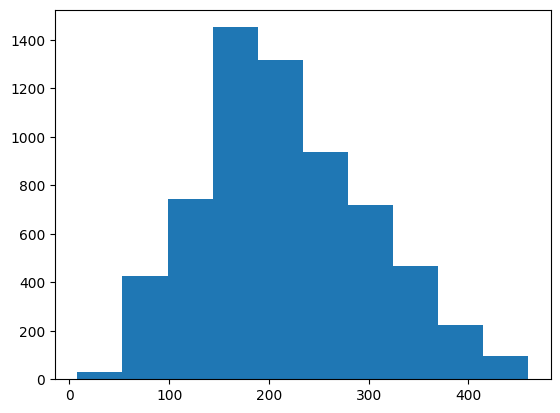

In [7]:
point_each_game = (GameInfo[["match_id", "set_id", "home_point", "away_point", "scoring"]]
                   .groupby("match_id")["scoring"].count()
                   .sort_values(ascending=False))

Q1 = point_each_game.quantile(0.25)
Q3 = point_each_game.quantile(0.75)
IQR = Q3 - Q1

point_each_game_cleaned = (point_each_game[~((point_each_game < (Q1 - 1.5 * IQR)) 
                                            |
                                            (point_each_game > (Q3 + 1.5 * IQR)))])

print(f" avrage servis per match = {point_each_game_cleaned.mean()}")
plt.hist(point_each_game_cleaned)
plt.show()

In [6]:
point_each_game_cleaned.mean()

np.float64(217.16027439975053)

In [138]:
a = GameInfo[["match_id", "set_id", "home_point", "away_point", "scoring"]]
a[a["scoring"] == 2]

,match_id,set_id,home_point,away_point,scoring
37,12301140,3,0,15,2
38,12301140,3,0,30,2
39,12301140,3,0,40,2
40,12301140,3,0,15,2
41,12301140,3,15,15,2
...,...,...,...,...,...
1466984,12317349,1,15,0,2
1466985,12317349,1,15,15,2
1466986,12317349,1,15,30,2
1466987,12317349,1,30,30,2


In [58]:
point_each_game = GameInfo[["match_id", "set_id", "home_point", "away_point"]]
point_each_game[point_each_game["match_id"]==12298430].head(20)

,match_id,set_id,home_point,away_point
7721,12298430,3,0,15
7722,12298430,3,15,15
7723,12298430,3,15,30
7724,12298430,3,30,30
7725,12298430,3,40,30
7726,12298430,3,40,40
7727,12298430,3,40,A
7728,12298430,3,40,40
7729,12298430,3,40,A
7730,12298430,3,40,40


In [12]:
PeriodInfo[PeriodInfo["statistic_category_name"]=="service"]

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,12276839,ALL,service,aces,4,3,1,positive,event,0,0,NaN,NaN
1,12276839,ALL,service,double_faults,2,1,1,negative,event,2,0,NaN,NaN
2,12276839,ALL,service,first_serve,46/77 (60%),42/64 (66%),2,positive,team,88,82,77.0,64.0
3,12276839,ALL,service,second_serve,29/31 (94%),21/22 (95%),2,positive,team,24,40,31.0,22.0
4,12276839,ALL,service,first_serve_points,31/46 (67%),29/42 (69%),2,positive,team,26,10,46.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794354,12334529,2ND,service,second_serve,7/9 (78%),13/13 (100%),2,positive,team,10,8,9.0,13.0
794355,12334529,2ND,service,first_serve_points,14/18 (78%),9/12 (75%),1,positive,team,12,16,18.0,12.0
794356,12334529,2ND,service,second_serve_points,3/9 (33%),11/13 (85%),2,positive,team,2,20,9.0,13.0
794357,12334529,2ND,service,service_games_played,5,5,3,positive,event,8,4,NaN,NaN
